### Torchvision has some vision datasets, using it to understand how to apply and use pytorch

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [2]:
train = datasets.MNIST("", train = True,  download=True, 
                      transform = transforms.Compose([ transforms.ToTensor()]))

In [3]:
test = datasets.MNIST("", train = False,  download=True, 
                      transform = transforms.Compose([ transforms.ToTensor()]))

In [4]:
type(train)

torchvision.datasets.mnist.MNIST

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size= 10, shuffle= True)
testset = torch.utils.data.DataLoader(test, batch_size= 10, shuffle= True)

In [6]:
type(trainset)

torch.utils.data.dataloader.DataLoader

### Define a neural network

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)

        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim =1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr = 0.001)

### Training

In [9]:
for epoch in range(3):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,784))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0644, grad_fn=<NllLossBackward>)
tensor(0.0132, grad_fn=<NllLossBackward>)
tensor(0.1768, grad_fn=<NllLossBackward>)


### Testing

In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                    correct +=1    
            total+=1

In [11]:
print("Accuracy : {}".format(correct/total))

Accuracy : 0.9682


In [12]:
torch.argmax(net(X[9].view(-1,784))[0])

tensor(8)

In [13]:
import os
import cv2 
import numpy as np
from tqdm import tqdm

In [14]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "data/PetImages/Cat/"
    DOGS = "data/PetImages/Dog/"
    TESTING = "data/PetImages/Testing"
    LABELS = {CATS : 0, DOGS: 1}
    training_data = []
    
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                if ".jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    
                    except Exception as e:
                        pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats",dogsvcats.catcount)
        print("Dogs" , dogsvcats.dogcount)
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

100%|██████████| 12501/12501 [00:24<00:00, 520.13it/s]


Cats 12476
Dogs 12470


In [15]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [16]:
import torch
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

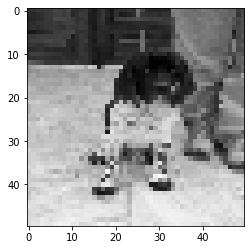

In [17]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")

In [18]:
print(y[0])


tensor([0., 1.])
